### 第一个DEMO 函数求解

GA参数列表及含义:

    + func  目标函数
    + n_dim 目标函数的维度
    + size_pop 默认 50, 种群规模
    + max_iter 默认200, 最大迭代次数
    + prob_mut  默认0.001, 变异概率
    + lb  默认-1, 每个参数的最小值
    + ub  默认1, 每个参数的最大值
    + constraint_eq  默认空元组, 线性约束
    + constraint_ueq 默认空元组, 非线性约束
    + precision  默认1e-7, 精度


GA_TSP参数列表及含义:

    + func  目标函数
    + n_dim 城市的个数
    + size_pop  默认50, 种群规模
    + max_iter  默认200, 最大迭代次数
    + prob_mut  默认0.001, 变异概率


In [13]:
# 定义问题
import numpy as np


def schafer(p):
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)

In [14]:
# 导包
from sko.GA import GA
# 输入参数
ga = GA(func=schafer, n_dim=2, size_pop=50, max_iter=800, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [2.98023233e-08 2.98023233e-08] 
 best_y: [0.]


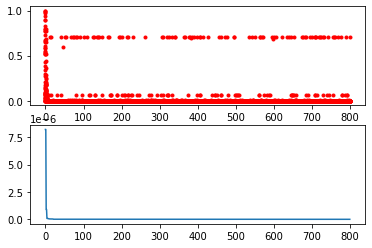

In [15]:
# 绘图
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

### 第二个DEMO TSP问题求解

In [16]:

from scipy import spatial

num_points = 50
 # 点位生成
points_coordinate = np.random.rand(num_points, 2)
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [17]:
# 导包
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

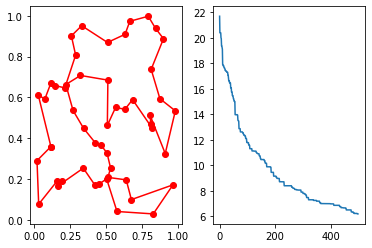

In [18]:
# 绘图
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()